In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from hmmlearn import hmm

from yellowbrick.classifier import ClassificationReport

In [5]:
injuries = os.path.join('data','data','wrangled_with_pop.csv')
dataset   = pd.read_csv(injuries)
pd.set_option('display.max_columns',None)
dataset.head(10)

,Unnamed: 0,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
0,0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963,41.46,-74.53,922140,1,0.0,1018519.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody,1,1,2015,1,10963,4298,1,23.266636
1,1,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.49,-80.11,484121,1,0.0,NaN,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed,1,1,2015,1,15108,40153,7,17.433318
2,2,2016010337,1053539,1/13/2016,Century Steel Erectors,200 Cherrington Business Park,Building #400,CORAOPOLIS,PENNSYLVANIA,15108,40.50,-80.18,238120,1,0.0,1118714.0,An employee stepped backwards off a landing de...,160,"Intracranial injuries, unspecified",111,Brain,4335,Other fall to lower level 21 to 25 feet,6395,"Porches, balconies, decks, patios",NaN,NaN,1,13,2016,1,15108,40153,7,17.433318
3,3,2016076266,1112166,7/12/2016,AMERICAN BRIDGE COMPANY,3000 American Bridge Way,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.52,-80.19,238120,1,0.0,1161862.0,An employee was removing a tire from a forklif...,132,"Cuts, lacerations",18,Multiple head locations,6241,"Struck by dislodged flying object, particle",4814,"Wheels, tire rims",8621.0,"Forklift, order picker, platform truck-powered",7,12,2016,1,15108,40153,7,17.433318
4,4,20161110356,1153924,11/2/2016,Lewis Goetz,160 McClaren Road,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.45,-80.22,423840,1,0.0,NaN,An employee was using a forklift to unload a p...,132,"Cuts, lacerations",112,Scalp,9999,Nonclassifiable,9999,Nonclassifiable,NaN,NaN,11,2,2016,1,15108,40153,7,17.433318
5,5,20161211963,1168021,12/27/2016,NHS Allegheny Valley School,1992 Ewings Mill Road,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.48,-80.14,623210,1,0.0,NaN,An employee was cleaning up water that had lea...,111,Fractures,512,Knee(s),422,Fall on same level due to slipping,6629,"Floor, n.e.c.",9521.0,Water,12,27,2016,1,15108,40153,7,17.433318
6,6,2018011018,1306615,1/31/2018,Total Equipment Company,400 Chess Street,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.52,-80.17,332710,1,0.0,1296308.0,An employee was operating a boring machine. He...,111,Fractures,423,Forearm(s),6412,Caught in running equipment or machinery durin...,3525,"Boring, routing, notching machines",NaN,NaN,1,31,2018,1,15108,40153,7,17.433318
7,7,2018043298,1325682,4/6/2018,Community Transportation,1425 4th Avenue,NaN,CORAOPOLIS,PENNSYLVANIA,15108,40.51,-80.15,485999,1,0.0,NaN,An employee was walking between vans in the pa...,111,Fractures,342,Pelvis,4212,Fall on same level due to tripping on uneven s...,6661,Parking lot irregularity,NaN,NaN,4,6,2018,1,15108,40153,7,17.433318
8,8,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206,32.77,-83.65,424490,1,0.0,1017194.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u...",1,1,2015,1,31206,29072,24,82.553660
9,9,2015010132,930318,1/6/2015,CHEROKEE BRICK & TILE COMPANY,3250 WATERVILLE ROAD,NaN,MACON,GEORGIA,31206,32.80,-83.63,327121,0,1.0,1018334.0,Employee sustained an amputation of two finger...,1311,Amputations,4429,"Finger(s), fingernail(s), n.e.c.",6410,"Caught in running equipme

In [9]:
print(dataset['Nature'].nunique)

<bound method IndexOpsMixin.nunique of 0         111
1          10
2         160
3         132
4         132
5         111
6         111
7         111
8        1972
9        1311
10       1311
11       1972
12       1729
13        111
14       1311
15        111
16       1721
17       1311
18       1311
19        134
20        160
21       1311
22        181
23       1311
24       1311
25       1972
26        189
27        162
28       1311
29       1510
         ... 
38596     111
38597    1311
38598     111
38599    1311
38600     111
38601     111
38602    1311
38603    1311
38604    1972
38605    1311
38606    1311
38607     111
38608     111
38609    1520
38610     111
38611     160
38612    1312
38613    1312
38614     111
38615    1972
38616    1231
38617    1311
38618    1311
38619     132
38620     111
38621     124
38622     111
38623     132
38624    1972
38625     111
Name: Nature, Length: 38626, dtype: int64>


In [10]:
print(dataset['Part of Body'].nunique)

<bound method IndexOpsMixin.nunique of 0         513
1        9999
2         111
3          18
4         112
5         512
6         423
7         342
8         510
9        4429
10       4422
11          6
12          6
13        510
14       4429
15        423
16          6
17       4429
18       4422
19         18
20        111
21       4429
22        899
23       4422
24       4422
25        420
26        440
27        111
28       4422
29        130
         ... 
38596     899
38597    4422
38598     310
38599    4422
38600     510
38601     899
38602    4429
38603    4422
38604     510
38605    4422
38606    4420
38607    4420
38608     512
38609     510
38610     321
38611     111
38612    4420
38613    1363
38614     421
38615     899
38616     511
38617    4429
38618    4420
38619     510
38620     511
38621     330
38622     532
38623     899
38624    4420
38625     899
Name: Part of Body, Length: 38626, dtype: int64>


### Removing NaN
Turns out there is a very large amount of rows with NaN somewhere in the DataFrame. By Removing all descriptive titles and **especially** 'Secondary Source'. Removing this gets us down to 16 rows with NaN in them

In [11]:
dataset1 = dataset
dataset1 = dataset1.drop(['Final Narrative','NatureTitle','Part of Body Title','EventTitle','SourceTitle','Secondary Source Title','Address1','Address2','Inspection','Secondary Source'], axis =1 ) 
dataset1.head()

,Unnamed: 0,ID,UPA,EventDate,Employer,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Nature,Part of Body,Event,Source,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
0,0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963,41.46,-74.53,922140,1,0.0,111,513,1214,5721,1,1,2015,1,10963,4298,1,23.266636
1,1,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108,40.49,-80.11,484121,1,0.0,10,9999,4331,8421,1,1,2015,1,15108,40153,7,17.433318
2,2,2016010337,1053539,1/13/2016,Century Steel Erectors,CORAOPOLIS,PENNSYLVANIA,15108,40.50,-80.18,238120,1,0.0,160,111,4335,6395,1,13,2016,1,15108,40153,7,17.433318
3,3,2016076266,1112166,7/12/2016,AMERICAN BRIDGE COMPANY,CORAOPOLIS,PENNSYLVANIA,15108,40.52,-80.19,238120,1,0.0,132,18,6241,4814,7,12,2016,1,15108,40153,7,17.433318
4,4,20161110356,1153924,11/2/2016,Lewis Goetz,CORAOPOLIS,PENNSYLVANIA,15108,40.45,-80.22,423840,1,0.0,132,112,9999,9999,11,2,2016,1,15108,40153,7,17.433318


In [12]:
dataset1 =dataset1.dropna()
dataset1.head()

,Unnamed: 0,ID,UPA,EventDate,Employer,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Nature,Part of Body,Event,Source,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
0,0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,OTISVILLE,NEW YORK,10963,41.46,-74.53,922140,1,0.0,111,513,1214,5721,1,1,2015,1,10963,4298,1,23.266636
1,1,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,CORAOPOLIS,PENNSYLVANIA,15108,40.49,-80.11,484121,1,0.0,10,9999,4331,8421,1,1,2015,1,15108,40153,7,17.433318
2,2,2016010337,1053539,1/13/2016,Century Steel Erectors,CORAOPOLIS,PENNSYLVANIA,15108,40.50,-80.18,238120,1,0.0,160,111,4335,6395,1,13,2016,1,15108,40153,7,17.433318
3,3,2016076266,1112166,7/12/2016,AMERICAN BRIDGE COMPANY,CORAOPOLIS,PENNSYLVANIA,15108,40.52,-80.19,238120,1,0.0,132,18,6241,4814,7,12,2016,1,15108,40153,7,17.433318
4,4,20161110356,1153924,11/2/2016,Lewis Goetz,CORAOPOLIS,PENNSYLVANIA,15108,40.45,-80.22,423840,1,0.0,132,112,9999,9999,11,2,2016,1,15108,40153,7,17.433318


In [24]:
df = dataset.loc[(dataset['Amputation']==1) & (dataset['Hospitalized']==0)]
df.head(20)

,Unnamed: 0,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
9,9,2015010132,930318,1/6/2015,CHEROKEE BRICK & TILE COMPANY,3250 WATERVILLE ROAD,NaN,MACON,GEORGIA,31206,32.80,-83.63,327121,0,1.0,1018334.0,Employee sustained an amputation of two finger...,1311,Amputations,4429,"Finger(s), fingernail(s), n.e.c.",6410,"Caught in running equipment or machinery, unsp...",3523,Milling machines,NaN,NaN,1,6,2015,1,31206,29072,24,82.553660
10,10,2015031466,971434,3/25/2015,Cherokee Brick and Tile Company,3250 Waterville Road,NaN,MACON,GEORGIA,31206,32.80,-83.63,327121,0,1.0,NaN,An employee was using a capstan and rope. The ...,1311,Amputations,4422,Fingertip(s),644,Entangled in other object or equipment,4423,"Drums, pulleys, sheaves",4224.0,"Rope, twine, string",3,25,2015,1,31206,29072,24,82.553660
14,14,2015129582,1047804,12/18/2015,"BLAKE & PENDLETON, INC.",455 LOWER BOUNDARY ST,NaN,MACON,GEORGIA,31206,32.81,-83.63,811310,0,1.0,NaN,The employee was working with another employee...,1311,Amputations,4429,"Finger(s), fingernail(s), n.e.c.",6412,Caught in running equipment or machinery durin...,423,"Valves, nozzles",NaN,NaN,12,18,2015,1,31206,29072,24,82.553660
18,18,2016098741,1136912,9/15/2016,Aspen Products Inc.,3220 Avondale Mill Road,NaN,MACON,GEORGIA,31206,32.69,-83.68,322212,0,1.0,1178805.0,An employee was unjamming a machine when the s...,1311,Amputations,4422,Fingertip(s),640,Caught in or compressed by equipment or object...,3740,"Paper production machinery, unspecified",NaN,NaN,9,15,2016,1,31206,29072,24,82.553660
21,21,2017088046,1258099,8/21/2017,Cherokee Brick and Tile,3250 WATERVILLE ROAD,NaN,MACON,GEORGIA,31206,32.80,-83.63,561320,0,1.0,NaN,An employee was moving a 3 x 8 metal plate whe...,1311,Amputations,4429,"Finger(s), fingernail(s), n.e.c.",642,Compressed or pinched by shifting objects or e...,4135,"Metal plates, metal panels",871.0,"Cart, dolly, hand truck-nonpowered",8,21,2017,1,31206,29072,24,82.553660
23,23,2017109745,1272654,10/10/2017,"Aspen Products, Inc.",3220 Avondale Mill Road,NaN,MACON,GEORGIA,31206,32.69,-83.67,322220,0,1.0,1290126.0,An employee was attempting to adjust or repair...,1311,Amputations,4422,Fingertip(s),6411,Caught in running equipment or machinery durin...,3421,Conveyors-belt,NaN,NaN,10,10,2017,1,31206,29072,24,82.553660
24,24,2018010701,1303068,1/22/2018,"Aspen Products, Inc.",3220 Avondale Mill Rd,NaN,MACON,GEORGIA,31206,32.69,-83.67,322220,0,1.0,1290197.0,An employee was using a wrench to adjust equip...,1311,Amputations,4422,Fingertip(s),6410,"Caught in running equipment or machinery, unsp...",30,"Machinery, unspecified",NaN,NaN,1,22,2018,1,31206,29072,24,82.553660
28,28,2018054450,1335976,5/8/2018,Aspen Products Inc.,3220 Avondale Mill Road,NaN,MACON,GEORGIA,31206,32.69,-83.67,322212,0,1.0,1316421.0,An employee was troubleshooting the shaker tab...,1311,Amputations,4422,Fingertip(s),6411,Caught in running equipment or machinery durin...,3749,"Paper production machinery, n.e.c.",NaN,NaN,5,8,2018,1,31206,29072,24,82.553660
30,30,2018066057,1350383,6/19/2018,"Great Yards, LLC.",5171 Eisenhower Pkwy,Suite A,MACON,GEORGIA,31206,32.80,-83.73,561730,0,1.0,NaN,An employee was attempting to hold branches fr...,1311,Amputations,4422,Fingertip(s),6252,Injured by slipping or swinging object held by...,7225,"Lawn edgers, clippers, trimmers-powered",NaN,NaN,6,19,2018,1,31206,29072,24,82.553660
34,34,2016043018,1080640,4/11/2016,"Panoramic, Inc.",1500 N. Parker Drive,NaN,JANESVILLE,WISCONSIN,53545,42.70,-89.03,326112,0,1.0,1140522.0,An employee was attempting to remove a clog be...,1311,Amputations,4422,Fingertip(s),6411,Caught in running equipment or machinery durin...,3569,"Presses, except printing, n.e.c.",NaN,NaN,4,11,2016,1,535

In [12]:
dataset1.astype({'Zip':'int','Amputation':'int'}).dtypes

Unnamed: 0         int64
ID                 int64
UPA                int64
EventDate         object
Employer          object
City              object
State             object
Zip                int32
Latitude         float64
Longitude        float64
Primary NAICS     object
Hospitalized       int64
Amputation         int32
Nature             int64
Part of Body       int64
Event              int64
Source             int64
Month              int64
Day                int64
Year               int64
InsideUS           int64
Zipcode            int64
2010Pop            int64
Counts             int64
Per100K          float64
dtype: object

In [13]:
dataset1.loc[dataset1['Primary NAICS'] == '48-49']

,Unnamed: 0,ID,UPA,EventDate,Employer,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Nature,Part of Body,Event,Source,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
2799,2799,2017021136,1180232,2/5/2017,Dart Container Corporation,PLANT CITY,FLORIDA,33563,28.0,-82.16,48-49,1,1.0,1311,4422,60,9999,2,5,2017,1,33563,25488,12,47.080979


Looks like just one row has the value. Drop it!

In [14]:
dataset1= dataset1.drop([0,2799])

In [35]:
dataset1 =dataset1.astype({'Primary NAICS':'int64','EventDate':'str'})

In [36]:
dataset1.dtypes

Unnamed: 0         int64
ID                 int64
UPA                int64
EventDate         object
Employer          object
City              object
State             object
Zip                int64
Latitude         float64
Longitude        float64
Primary NAICS      int64
Hospitalized       int64
Amputation       float64
Nature             int64
Part of Body       int64
Event              int64
Source             int64
Month              int64
Day                int64
Year               int64
InsideUS           int64
Zipcode            int64
2010Pop            int64
Counts             int64
Per100K          float64
dtype: object

### Feature Extraction
Now we're down to 38610 instances from 38626 

In [37]:
features = ['Employer', 'Primary NAICS','Part of Body']
target   = ['Hospitalized']

X = dataset1[features]
y = dataset1[target]

In [38]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average=None)))

In [42]:
models = [
    SVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

SVC: [0.         0.88644689 0.         0.         0.        ]
LinearSVC: [0.9741486  0.99304549 0.93303571 1.         1.        ]
SGDClassifier: [0.77469974 0.93437521 0.         0.         0.        ]
KNeighborsClassifier: [0.80037795 0.94444808 0.0167364  0.         0.        ]
LogisticRegression: [0.84841378 0.95578483 0.         0.         0.        ]
LogisticRegressionCV: [0.77184935 0.93359821 0.         0.         0.        ]
BaggingClassifier: [0.94708122 0.98512548 0.81795511 0.88888889 1.        ]
ExtraTreesClassifier: [0.98954749 0.9972609  0.98501071 1.         1.        ]
RandomForestClassifier: [0.98950935 0.9972634  0.98501071 1.         1.        ]


### K-Means Elbow

Quick operation to see if there is a good number to set K in initial K-Means clustering analysis. 

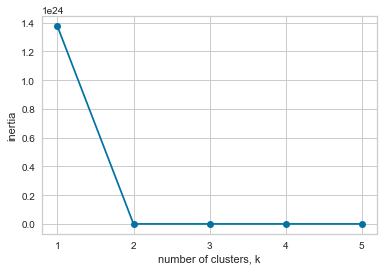

In [56]:
dataset2 = dataset1.drop(['State','City','Employer','EventDate'], axis =1)
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dataset2)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
from matplotlib import pyplot as plt    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


,Unnamed: 0,ID,UPA,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Nature,Part of Body,Event,Source,Month,Day,Year,InsideUS,Zipcode,2010Pop,Counts,Per100K
1,1,2015010018,929823,15108,40.49,-80.11,484121,1,0.0,10,9999,4331,8421,1,1,2015,1,15108,40153,7,17.433318
2,2,2016010337,1053539,15108,40.50,-80.18,238120,1,0.0,160,111,4335,6395,1,13,2016,1,15108,40153,7,17.433318
3,3,2016076266,1112166,15108,40.52,-80.19,238120,1,0.0,132,18,6241,4814,7,12,2016,1,15108,40153,7,17.433318
4,4,20161110356,1153924,15108,40.45,-80.22,423840,1,0.0,132,112,9999,9999,11,2,2016,1,15108,40153,7,17.433318
5,5,20161211963,1168021,15108,40.48,-80.14,623210,1,0.0,111,512,422,6629,12,27,2016,1,15108,40153,7,17.433318


In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
print(kmeans.cluster_centers_)

[[ 1.90318831e+04  2.01650163e+09  1.15879593e+06  4.74524149e+04
   3.67114923e+01 -8.77570847e+01  3.93973747e+05  8.08633221e-01
   2.66294392e-01  8.68425161e+02  2.18615916e+03  3.89690519e+03
   4.83009957e+03  5.65224842e+00  1.55755185e+01  2.01644026e+03
   9.99763635e-01  4.74524149e+04  2.27681752e+04  9.59392543e+00
   2.90632618e+03]
 [ 2.15106118e+04  2.01744968e+10  1.32338538e+06  4.75973487e+04
   3.69097657e+01 -8.79036814e+01  3.93137881e+05  8.05220884e-01
   2.81124498e-01  8.23447122e+02  2.08947456e+03  3.95101841e+03
   4.83312282e+03  1.07212182e+01  1.65026774e+01  2.01734137e+03
   9.99665328e-01  4.75973487e+04  2.23139926e+04  9.72088353e+00
   2.29527748e+03]
 [ 2.09360276e+04  2.01611333e+10  1.16008882e+06  4.64495716e+04
   3.69480722e+01 -8.72209865e+01  3.93473891e+05  8.19052988e-01
   2.84667418e-01  8.37870349e+02  2.03957384e+03  3.87830722e+03
   4.72575874e+03  1.12226607e+01  1.63494927e+01  2.01600000e+03
   1.00000000e+00  4.64495716e+04  2.3

In [68]:
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


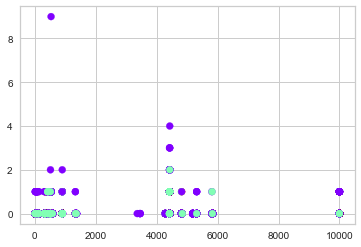

In [71]:
plt.scatter(dataset2.values[:,10],dataset2.values[:,8], c=kmeans.labels_, cmap='rainbow')

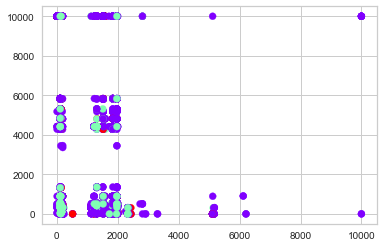

In [75]:
plt.scatter(dataset2.values[:,9],dataset2.values[:,10], c=kmeans.labels_, cmap='rainbow')